In [1]:
from one.api import ONE
from brainbox.io.one import SessionLoader, SpikeSortingLoader
from brainbox.singlecell import bin_spikes
from iblatlas.atlas import AllenAtlas
import numpy as np
import matplotlib.pyplot as plt


C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\alf\files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
ba = AllenAtlas()
one = ONE()
pid = '695476f6-4c14-4a2f-b658-948514629079'
eid, _ = one.pid2eid(pid)
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

# In code below is the time before and after an event for a single neurons raster plot across all trials in a session

In [3]:
ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
spikes, clusters, channels = ssl.load_spike_sorting()
clusters = ssl.merge_clusters(spikes, clusters, channels)

C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)
C:\Users\elsha\anaconda3\envs\ibl\Lib\site-packages\one\util.py:543: ALFWarning: Multiple revisions: "", "2024-05-06"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


In [4]:
cluster_id = np.where(clusters['label'] == 1)[0][0]
spikes_idx = spikes['clusters'] == cluster_id
spikes_idx

array([False,  True, False, ..., False, False, False])

In [5]:
events = np.array(sl.trials['stimOn_times'])
bin_size = 0.05
pre_time = 0.5
post_time = 1
spike_times = spikes.times[spikes_idx]
spike_raster, times = bin_spikes(spike_times, events, pre_time=pre_time, post_time=post_time, bin_size=bin_size)
spikes_raster = spike_raster / bin_size

In [6]:
fig, ax = plt.subplots()
ax.imshow(spike_raster, extent=[times[0], times[-1], 0, events.size], origin='lower', cmap='binary', aspect='auto', vmax=20, vmin=0)
ax.axvline(0, c='k', linestyle='--')
ax.set_xlabel('Time from stimulus (s)')
ax.set_ylabel('Trial number')

Text(0, 0.5, 'Trial number')

Text(0.5, 0, 'Time from stimulus (s)')

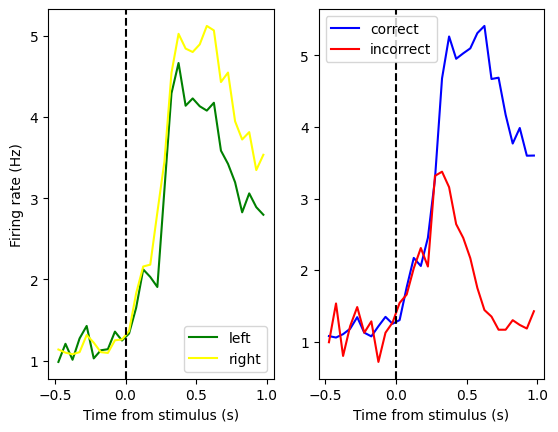

In [7]:
# Compute psth for left vs right stimulus trials
left_idx = ~np.isnan(sl.trials['contrastLeft'])
right_idx = ~np.isnan(sl.trials['contrastRight'])
psth_left = np.nanmean(spike_raster[left_idx], axis=0)
psth_right = np.nanmean(spike_raster[right_idx], axis=0)

# Compute psth for correct vs incorrect trials
correct_idx = sl.trials['feedbackType'] == 1
incorrect_idx = sl.trials['feedbackType'] == -1
psth_correct = np.nanmean(spike_raster[correct_idx], axis=0)
psth_incorrect = np.nanmean(spike_raster[incorrect_idx], axis=0)

fig, axs = plt.subplots(1, 2)
axs[0].plot(times, psth_left, c='green')
axs[0].plot(times, psth_right, c='yellow')
axs[0].legend(['left', 'right'])
axs[0].axvline(0, c='k', linestyle='--')
axs[0].set_xlabel('Time from stimulus (s)')
axs[0].set_ylabel('Firing rate (Hz)')

axs[1].plot(times, psth_correct, c='blue')
axs[1].plot(times, psth_incorrect, c='red')
axs[1].legend(['correct', 'incorrect'])
axs[1].axvline(0, c='k', linestyle='--')
axs[1].set_xlabel('Time from stimulus (s)')

In [8]:
sessions_with_spikes = one.search(project='brainwide', dataset='ibl_trials.table')


In [9]:
eid = sessions_with_spikes[0]

In [10]:
sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\churchlandlab_ucla\Subjects\MFD_09\2023-10-19\001\
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\churchlandlab_ucla\Subjects\MFD_09\2023-10-19\001\
(S3) C:\Users\elsha\Downloads\ONE\openalyx.internationalbrainlab.org\churchlandlab_ucla\Subjects\MFD_09\2023-10-19\001\


In [11]:
sl.trials

goCueTrigger_times  stimOff_times  goCue_times  response_times  choice  \
0             13.648230      15.156255    13.649192       14.099033    -1.0   
1             16.858861      18.258806    16.859900       17.199067     1.0   
2             19.872914      21.272799    19.873893       20.212920    -1.0   
3             23.692570      25.072820    23.693512       24.023372    -1.0   
4             27.242310      28.575402    27.243189       27.521317    -1.0   
..                  ...            ...          ...             ...     ...   
564         5541.470633    5601.534146  5541.471608     5601.472632     0.0   
565         5605.684295    5669.350413  5605.685002     5665.686058     0.0   
566         5670.052920    5695.719649  5670.053716     5693.643269     1.0   
567         5697.767231    5761.402509  5697.768062     5757.769117     0.0   
568         5762.116582    7162.051947  5762.117478     5800.503049     1.0   

     stimOn_times  contrastLeft  contrastRight  probabilityLeft  \
0       13.739751           NaN         1.0000              0.5   
1       16.858734        0.2500            NaN              0.5   
2       19.872693           NaN         0.2500              0.5   
3       23.692446           NaN         0.1250              0.5   
4       27.242123           NaN         0.2500              0.5   
..            ...           ...            ...              ...   
564   5540.984852        0.0625            NaN              0.2   
565   5605.186648           NaN         0.0625              0.2   
566   5669.386410           NaN         0.1250              0.2   
567   5697.767129           NaN         0.0625              0.2   
568   5761.516499           NaN         0.1250              0.2   

     feedback_times  feedbackType  rewardVolume  firstMovement_times  \
0         14.099118           1.0           1.5            13.976156   
1         17.199169           1.0           1.5            16.983156   
2         20.213029           1.0           1.5            19.987156   
3         24.023482           1.0           1.5            23.805156   
4         27.521431           1.0           1.5            27.313156   
..              ...           ...           ...                  ...   
564     5601.473319          -1.0           0.0                  NaN   
565     5665.686713          -1.0           0.0          5644.357156   
566     5693.644071          -1.0           0.0          5689.185156   
567     5757.769806          -1.0           0.0                  NaN   
568     7161.872830          -1.0           0.0          5800.034156   

     intervals_0  intervals_1  
0      12.933124    15.656348  
1      16.302151    18.758896  
2      19.380104    21.772851  
3      22.426161    25.572885  
4      26.182586    29.075456  
..           ...          ...  
564  5540.918925  5603.972672  
565  5605.120587  5668.186096  
566  5669.385810  5696.219710  
567  5697.119721  5760.269156  
568  5761.448472  5803.066389  

[569 rows x 15 columns]

In [12]:
import pandas as pd
import seaborn as sns
sl.trials=sl.trials.assign(time_diff=sl.trials['feedback_times'] - sl.trials['stimOn_times'])
sl.trials[sl.trials['firstMovement_times'] < 5000].plot(kind='line',y='time_diff')

<Axes: >

In [13]:
sns.pairplot(sl.trials, diag_kind='kde')

(-10.0, 70.0)

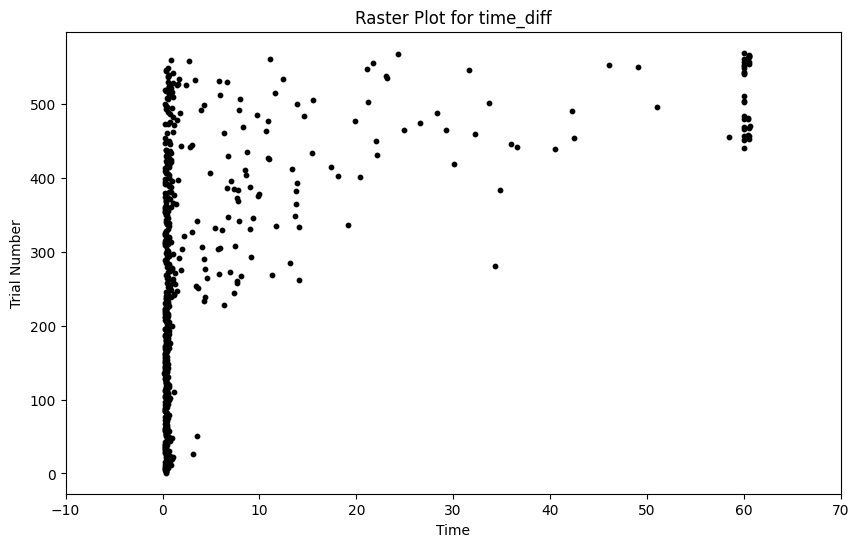

In [14]:
trials = sl.trials

plt.figure(figsize=(10, 6))
for i, j in enumerate(trials['time_diff']):
    plt.scatter(j, i + 1, color='black', s=10)

plt.xlabel('Time')
plt.ylabel('Trial Number')
plt.title('Raster Plot for time_diff')
plt.xlim(-10, 70)

In [15]:
bins = np.arange(0, 71, 10)
trials['time_diff'] = pd.cut(trials['time_diff'], bins=bins, right=False, labels=bins[:-1])
grouped_counts = trials.groupby(['time_diff', 'feedbackType']).size().unstack(fill_value=0)
x = np.arange(len(bins) - 1)
w = 0.4

plt.figure(figsize=(10, 6))
plt.bar(x - w / 2, grouped_counts[1.0], width=w, label='Correct', color='blue')
plt.bar(x + w / 2, grouped_counts[-1.0], width=w, label='Wrong', color='red')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Histogram of time_diff by Correctness')
plt.xticks(x, labels=[f'{int(start)}-{int(start + 10)}' for start in bins[:-1]])
plt.legend()
plt.grid(axis='y', linestyle='--')

C:\Users\elsha\AppData\Local\Temp\ipykernel_45304\4000924755.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = trials.groupby(['time_diff', 'feedbackType']).size().unstack(fill_value=0)
